# Data Analysis with `pandas`

The first of the computing libraries we will cover is `pandas`. `pandas` is the most common package used in data analysis, with a focus on data manipulation and processing.

We have already worked a bit with data frames, which are the core data type in `pandas`. In this notebook, we will cover some of the basic functionality of `pandas`.

To learn more, check out D-Lab's [Python Data Wrangling workshop](https://github.com/dlab-berkeley/Python-Data-Wrangling).

In [1]:
# pandas is frequently imported with the alias pd
import pandas as pd

For now, let's use an existing dataset, the [penguins dataset](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download&select=penguins_size.csv)! The dataset consists of body measurements for three penguin species (Adelie, Chinstrap, Gentoo). We will load in the file and use `df.head()` to look at the first few items.

The data has the following columns: 

- Species (Adelie, Gentoo, Chinstrap)
- Island
- Culmen Length (mm)
- Culmen Depth (mm)
- Flipper Length (mm)
- Body Mass (g)
- Sex (MALE / FEMALE)

The culmen is the top part of the penguin's bill!

In [3]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## DataFrame Methods

There are many methods for summarizing `pd.DataFrames`:
1. `df.describe()`: Summarize the data frame columns.
2. `df.value_counts()`: Calculate counts per unique value in a column.
3. `df[column'].unique()`:  Unique values in a column.
4. `df.isnull().sum()`: Calculate the number of null values.
5. `df.dropna()`: Drop all rows with null values.

In [4]:
# Why are only some of the columns visible here?
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
print(penguins['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [6]:
print(penguins.value_counts('species'))

species
Adelie       152
Gentoo       124
Chinstrap     68
dtype: int64


In [7]:
penguins.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
penguins = penguins.dropna()

## Selecting Columns and Rows

We can use `.loc[row, column]` to index columns and rows in the DataFrame. A `:` indicates to use *all* columns/rows.

In [9]:
# First row, all columns
penguins.loc[0, :]

species                 Adelie
island               Torgersen
culmen_length_mm          39.1
culmen_depth_mm           18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [10]:
# Select the species column, all rows
penguins.loc[:, 'species']

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object

In [11]:
# This is equivalent to directly selecting the column
penguins['species']

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object

In [12]:
# Select the body_mass for the third penguin
penguins.loc[2, 'body_mass_g']

3250.0

In [13]:
# We can also use Boolean masks to subset our data frame 
penguins.loc[penguins['sex'] == 'FEMALE', :]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE


## Challenge 1: Subsetting a DataFrame

1. Select all Adelie penguins and calculate the mean body mass (**Hint**: use `.mean()`).
2. Do the same for Gentoo and Chinstrap penguins.

In [15]:
##your code here

## Modifying the DataFrame 

Sometimes, we want to modify a dataframe. For example, we can create a new column by simply assigning it with bracket notation. This is called **vectorization**, where instead of modifying each item in the series individually with a loop, it is computed all at once. This type of method is faster than looping for repeated computations.

In [18]:
penguins['body_mass_kg'] = penguins['body_mass_g'] / 1000

penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,3.750
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3.800
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3.250
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,3.450
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,3.650
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,4.925
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,4.850
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,5.750
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,5.200


A column can also be modified using bracket notation and methods. For example, we can convert a column to another type.

If we convert `body_mass_g` to a string column, then numeric operations will no longer work.

In [19]:
penguins['body_mass_g'] = penguins['body_mass_g'].astype(str)
penguins['body_mass_g'] / 1000

TypeError: unsupported operand type(s) for /: 'str' and 'int'

**Vectorized string functions** can also be applied to columns, using the syntax `df.str.method()`:

In [21]:
# Make island name lower case
penguins['island'].str.lower()

0      torgersen
1      torgersen
2      torgersen
4      torgersen
5      torgersen
         ...    
338       biscoe
340       biscoe
341       biscoe
342       biscoe
343       biscoe
Name: island, Length: 334, dtype: object

## Challenge 2: Column Manipulation

1. Calculate the ratio between `culmen length` and `culmen depth` and save it to a new column called `culmen ratio`.
2. Convert the `sex` column to a number (0 = FEMALE, 1 = MALE). 

In [ ]:
# YOUR CODE HERE


## Plotting with `pandas`

`pandas` also offers some basic plotting functions. In this section, we will cover three basic types of plots: histograms, scatter plots, and box plots. See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for further information on plotting and plot customization.

### Histograms

A histogram shows the distribution of a variable using binned values. We can call this using the syntax: `df[column].plot(kind='hist')`.

The `bins` keyword argument changes the number of bins in the histogram. A few examples of the bins argument are below. Which plot would you pick?

Plot A: 5 Bins


<AxesSubplot:title={'center':'Histogram of body mass values'}, ylabel='Frequency'>

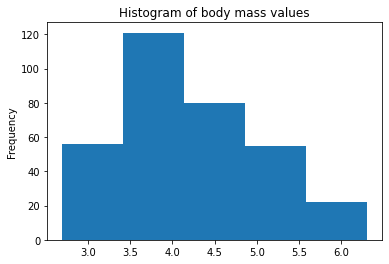

In [22]:
print('Plot A: 5 Bins')
penguins['body_mass_kg'].plot(kind='hist', title='Histogram of body mass values', bins=5)

Plot B: 10 Bins


<AxesSubplot:title={'center':'Histogram of body mass values'}, ylabel='Frequency'>

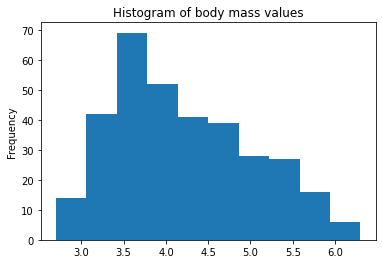

In [23]:
print('Plot B: 10 Bins')
penguins['body_mass_kg'].plot(kind='hist', title='Histogram of body mass values', bins=10)

Plot C: 20 bins


<AxesSubplot:title={'center':'Histogram of body mass values'}, ylabel='Frequency'>

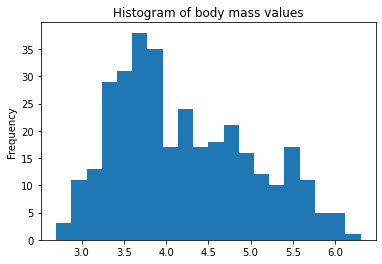

In [24]:
print('Plot C: 20 bins')
penguins['body_mass_kg'].plot(kind='hist', title='Histogram of body mass values', bins=20)

### Scatter Plots

Scatter plots visualize bivariate relationships. We can create a scatter plot by specifying the columns to use for the `x` and `y` axes:

<AxesSubplot:title={'center':'Relationship between culmen length and depth'}, xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

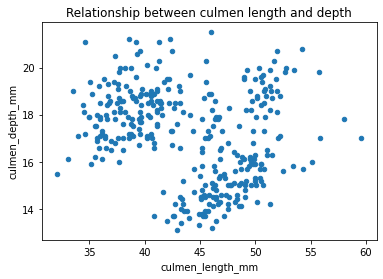

In [25]:
penguins.plot(kind='scatter',
              x='culmen_length_mm',
              y='culmen_depth_mm',
              title='Relationship between culmen length and depth')

### Bar Plots

Bar plots visualize the counts of several different groups. We'll often need to do some preprocessing before we can create the bar plot.

For example, if we want to make a bar plot with the number of observations for each species, we summarize those values first, and then plot the result using a bar plot.

<AxesSubplot:title={'center':'Count of each species'}, xlabel='species'>

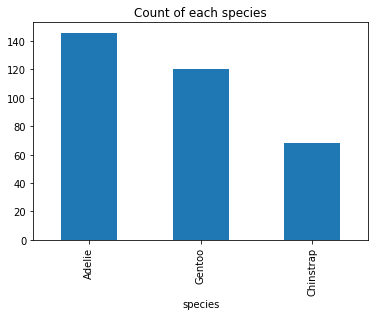

In [26]:
penguins.value_counts('species').plot(kind='bar', title='Count of each species')

## Challenge 3: Customizing a Plot

Most visualizations treat images as "layers" on the backend. This allows us to create customizations to plots pretty easily, because each customization would be a new "layer".

Let's create a scatter plot with multiple parts. Specifically, we want to visualize the culmen depth vs. the culmen length for each of the penguin species separately. We'll use different colors for each species.

To do this, we set the first layer equal to the variable `ax`. This represents our plot. Then, in subsequent plots, we include the argument `ax=ax`. This tells `pandas` to send new plots as layers on the original plot.

1. Make three different sub-DataFrames, one for each species, using `.loc[]` and a Boolean mask.
2. Plot the first layer and set it equal to `ax`.
3. Plot subsequent layers. Use a different color for each species (look at the documentation for the name of the color parameter). Some possible colors to use are `'green'`, `'red'`, `'purple'`, `'black'`, etc. 
4. Add a title and any other modifications to the plot (better x and y labels, for example).

In [ ]:
# YOUR CODE HERE

# Subset Data 
chinstrap = 
adelie = 
gentoo = 

# Create plot
ax = # First layer
# Plot other layers


For more on data visualization, check out D-Lab's [Python Data Visualization workshop](https://github.com/dlab-berkeley/Python-Data-Visualization).